In [27]:
import pandas as pd
dfOnline = pd.read_csv("../data/online_shoppers_intention.csv")
dfOnline.shape

(12330, 18)

In [28]:
num_ftrs_stand = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
num_ftrs_minmax = ["Administrative" ,"Informational","ProductRelated","PageValues" ]
onehot_ftrs = ["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType", "Weekend"]
label = 'Revenue'

Apply MinMaxEncoder or StandardScaler on the continuous features

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
MinMax = pd.DataFrame(data = dfOnline[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]])
dfMinMax = pd.DataFrame(data = scaler1.fit_transform(MinMax))
dfMinMax.columns = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]

scaler2 = MinMaxScaler()
Standard = pd.DataFrame(data = dfOnline[["Administrative" ,"Informational","ProductRelated","PageValues"]])
dfStandard = pd.DataFrame(data = scaler2.fit_transform(Standard))
dfStandard.columns = ["Administrative" ,"Informational","ProductRelated","PageValues" ]

Apply OneHotEncoder or OrdinalEncoder on categorical features

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

dfOneHot = pd.DataFrame(dfOnline[["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType", "Weekend"]])
enc = OneHotEncoder(sparse=False,handle_unknown ='ignore' )
allOneHot = enc.fit_transform(dfOneHot)
colNames = list(enc.get_feature_names(["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType", "Weekend"]))
dfOneHot_new = pd.DataFrame(data = allOneHot)
dfOneHot_new.columns = colNames



Apply the LabelEncoder on the target variable

In [31]:
from sklearn.preprocessing import LabelEncoder
tar =  LabelEncoder()
TaVar = list(dfOnline["Revenue"])
dfTaVar = pd.DataFrame(data = tar.fit_transform(TaVar))
dfTaVar.columns = ["Revenue"]


Unchanged features

In [32]:
dfUnchange = dfOnline[["BounceRates","ExitRates"]]

Combine all the preprocessed data together

In [33]:
frames = [dfOneHot_new,dfMinMax,dfUnchange,dfStandard,dfTaVar]
dfCombined = pd.concat(frames, axis = 1)
dfCombined.head()
dfCombined.to_csv('../data/prepocessedData.csv')


Check the missing values

In [7]:
print(dfCombined.isnull().sum(axis=0)/dfCombined.shape[0])


SpecialDay_0.0    0.000000
SpecialDay_0.2    0.000000
SpecialDay_0.4    0.000000
SpecialDay_0.6    0.000000
SpecialDay_0.8    0.000000
                    ...   
Administrative    0.001135
Informational     0.001135
ProductRelated    0.001135
PageValues        0.000000
Revenue           0.000000
Length: 81, dtype: float64


From the percentage above, I notice that only small fraction of points contain missing values. Then, I did the MCAR test. 

From MCAR test, the p-value is aound 0.007 which is much smaller than 0.05. So, I decided to drop those observations. 

In [8]:
dfAfterDrop = dfCombined.dropna()
print(dfAfterDrop.shape)
dfAfterDrop.to_csv('../data/prepocessedData_Afterdrop.csv')

(12316, 81)


### EDA
##### The balance of the dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
dfUseforEDA = dfOnline.dropna()

In [10]:
label = "Revenue"
labelM= dfUseforEDA[label].value_counts()/dfUseforEDA[label].shape
print(dfUseforEDA[label].value_counts()/dfUseforEDA[label].shape)

False    0.84508
True     0.15492
Name: Revenue, dtype: float64


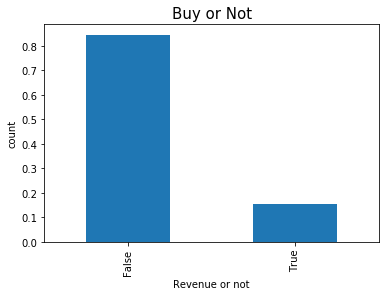

In [11]:
import matplotlib
from matplotlib import pylab as plt
labelM.plot(kind='bar', stacked=True)
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.savefig('../figures/Revenue.png',dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

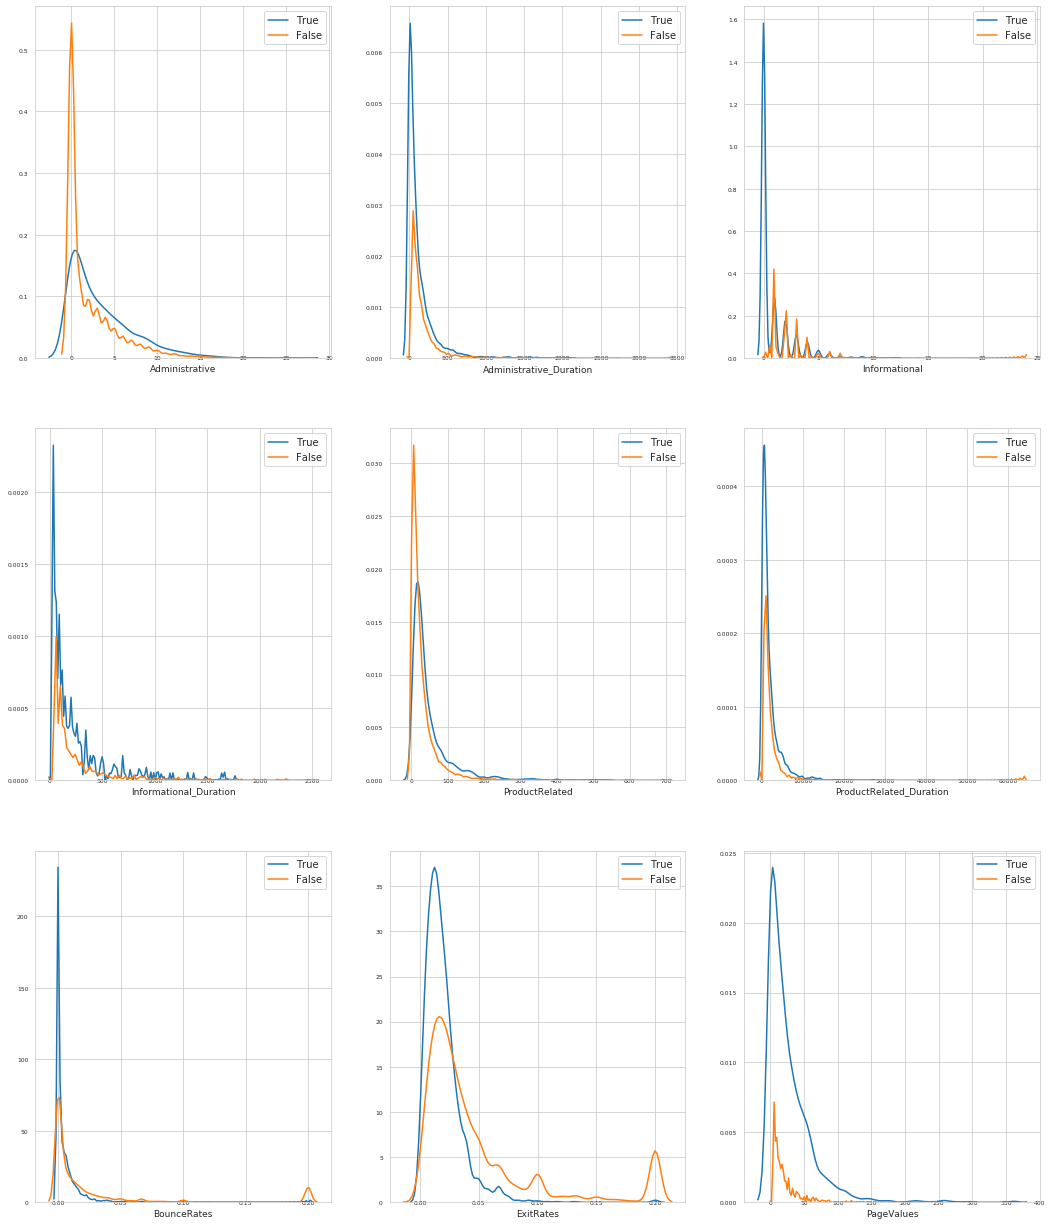

In [12]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    fig.savefig('../figures/Overall.png', bbox_inches="tight")
    plt.show();

t0 = dfUseforEDA.loc[dfUseforEDA['Revenue'] == True]
t1 = dfUseforEDA.loc[dfUseforEDA['Revenue'] == False]
features = dfUseforEDA.columns.values[0:9]
plot_feature_distribution(t0, t1, 'True', 'False', features)

<Figure size 432x288 with 0 Axes>

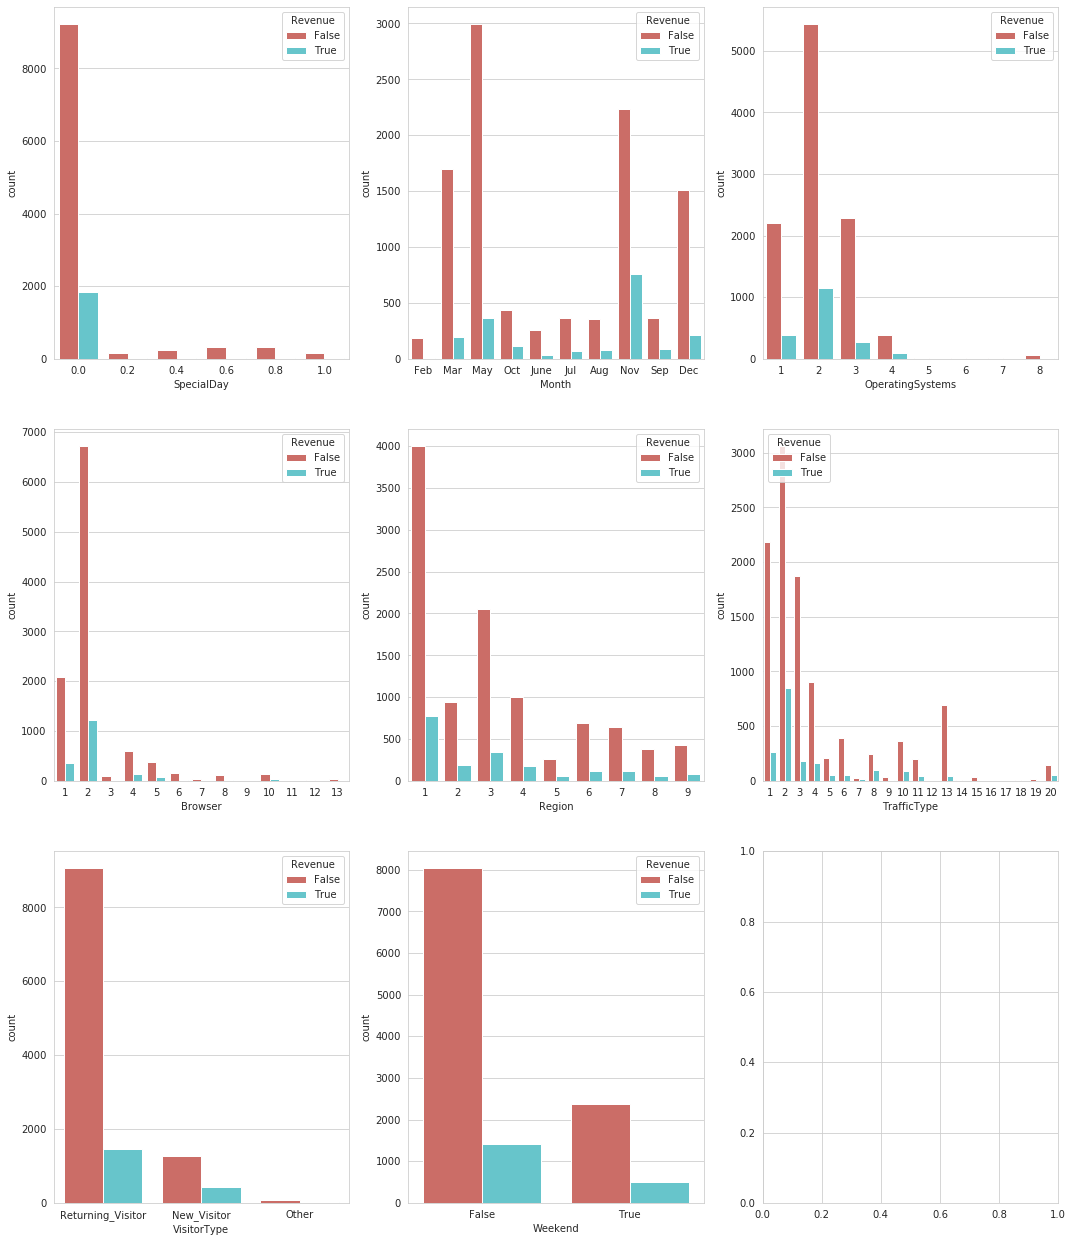

In [13]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.countplot(dfUseforEDA[feature],hue=dfUseforEDA["Revenue"],palette="hls")
    fig.savefig('../figures/Overall2.png', bbox_inches="tight")
    plt.show();

t0 = dfUseforEDA.loc[dfUseforEDA['Revenue'] == True]
t1 = dfUseforEDA.loc[dfUseforEDA['Revenue'] == False]
features = dfUseforEDA.columns.values[9:17]
plot_feature_distribution(t0, t1, 'True', 'False', features)

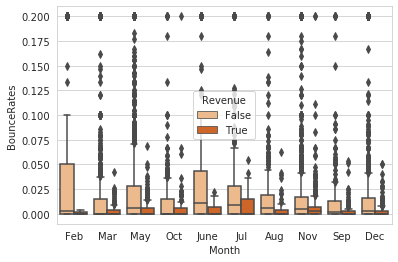

In [14]:
sns.boxplot(x = dfUseforEDA['Month'], y = dfUseforEDA['BounceRates'], hue = dfUseforEDA['Revenue'], palette = 'Oranges')

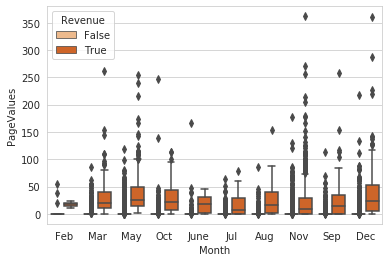

In [15]:
sns.boxplot(x = dfUseforEDA['Month'], y = dfUseforEDA['PageValues'], hue = dfUseforEDA['Revenue'], palette = 'Oranges')
plt.savefig('../figures/PageValues_Month.png',dpi=300)

##### Select top 10 features to visualize

In [16]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
UseforSelect = pd.read_csv("../data/prepocessedData_Afterdrop.csv")
dfUseforSelect = pd.DataFrame(data = UseforSelect)
y = dfUseforSelect[label].values # the target variable
dfUseforSelect.drop(columns=['Revenue'],inplace=True)
dfUseforSelect.drop(dfUseforSelect.columns[0],axis=1,inplace=True)
X = dfUseforSelect.values # the feature matrix
feature_names =dfUseforSelect.columns # feature names

from sklearn.feature_selection import SelectKBest
f_selector = SelectKBest(mutual_info_regression,k=10)
X_mi = f_selector.fit_transform(X,y)
print(feature_names[f_selector.get_support()])

f_select = SelectKBest(f_regression,k=10)
X_f = f_select.fit_transform(X,y)
print(feature_names[f_select.get_support()])

Index(['Month_Oct', 'OperatingSystems_2', 'TrafficType_13',
       'Administrative_Duration', 'ProductRelated_Duration', 'BounceRates',
       'ExitRates', 'Administrative', 'ProductRelated', 'PageValues'],
      dtype='object')
Index(['Month_Nov', 'TrafficType_2', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'Administrative', 'ProductRelated',
       'PageValues'],
      dtype='object')


In [17]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
UseforSelect = pd.read_csv("../data/prepocessedData_Afterdrop.csv")
dfUseforSelect = pd.DataFrame(data = UseforSelect)
y = dfUseforSelect[label].values # the target variable
dfUseforSelect.drop(columns=['Revenue'],inplace=True)
dfUseforSelect.drop(dfUseforSelect.columns[0],axis=1,inplace=True)
X = dfUseforSelect.values # the feature matrix
feature_names =dfUseforSelect.columns # feature names

from sklearn.feature_selection import SelectKBest
f_selector = SelectKBest(mutual_info_regression,k=2)
X_mi = f_selector.fit_transform(X,y)
print(feature_names[f_selector.get_support()])

f_select = SelectKBest(f_regression,k=2)
X_f = f_select.fit_transform(X,y)
print(feature_names[f_select.get_support()])

Index(['ExitRates', 'PageValues'], dtype='object')
Index(['ExitRates', 'PageValues'], dtype='object')


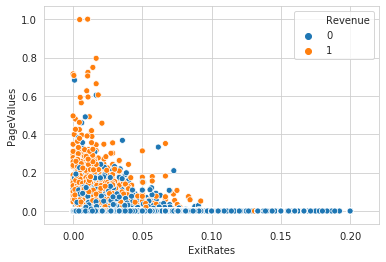

In [18]:
ax = sns.scatterplot(x="ExitRates", y="PageValues", hue="Revenue", data=dfAfterDrop)

In [ ]:
New = list(feature_names[f_selector.get_support()]) + list(feature_names[f_select.get_support()])
newset=set(New)
print(newset,"\n")
print(len(newset), "features in total")

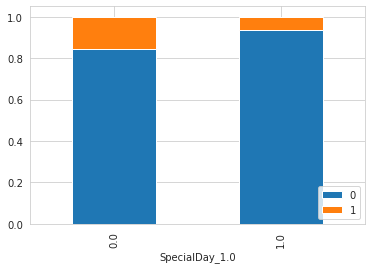

In [20]:
count_matrix = dfAfterDrop.groupby(['SpecialDay_1.0', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/SpecialDay_1.0.png',dpi=300)
plt.show()

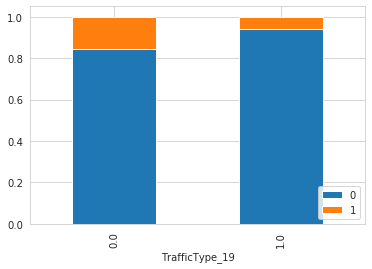

In [21]:
count_matrix = dfAfterDrop.groupby(['TrafficType_19', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/TrafficType_19.png',dpi=300)
plt.show()

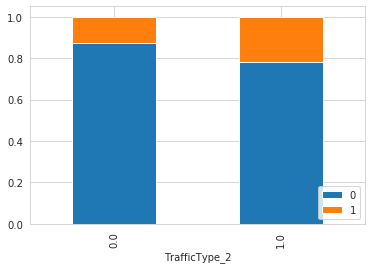

In [22]:
count_matrix = dfAfterDrop.groupby(['TrafficType_2', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/TrafficType_2.png',dpi=300)
plt.show()

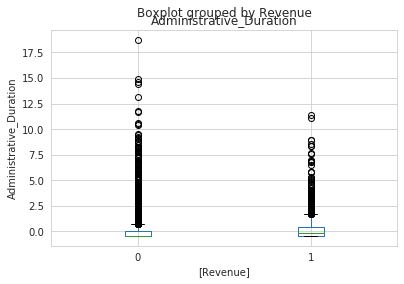

In [23]:
dfAfterDrop[['Administrative_Duration',label]].boxplot(by=label)
plt.ylabel('Administrative_Duration')
plt.savefig('../figures/Administrative_Duration.png',dpi=300)
plt.show()

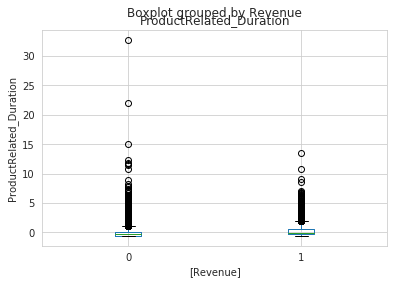

In [24]:
dfAfterDrop[['ProductRelated_Duration',label]].boxplot(by=label)
plt.ylabel('ProductRelated_Duration')
plt.savefig('../figures/ProductRelated_Duration.png',dpi=300)
plt.show()

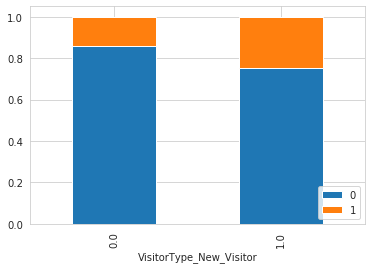

In [25]:
count_matrix = dfAfterDrop.groupby(['VisitorType_New_Visitor', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/VisitorType_New_Visitor.png',dpi=300)
plt.show()

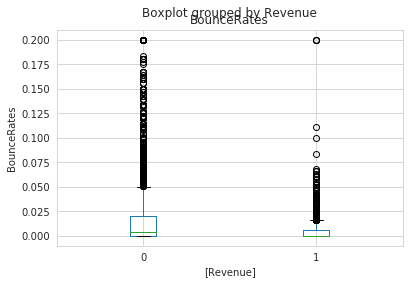

In [26]:
dfAfterDrop[['BounceRates',label]].boxplot(by=label)
plt.ylabel('BounceRates')
plt.savefig('../figures/BounceRates.png',dpi=300)
plt.show()

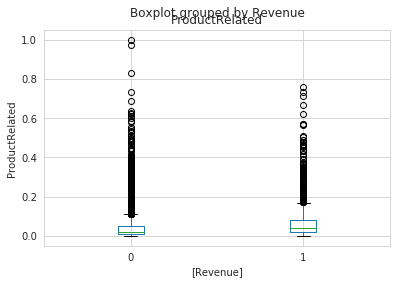

In [27]:
dfAfterDrop[['ProductRelated',label]].boxplot(by=label)
plt.ylabel('ProductRelated')
plt.savefig('../figures/ProductRelated.png',dpi=300)
plt.show()

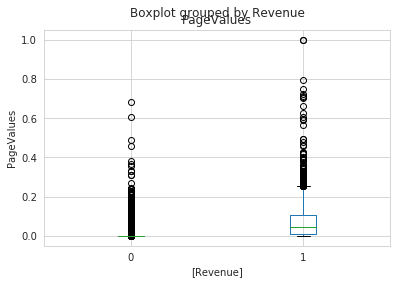

In [28]:
dfAfterDrop[['PageValues',label]].boxplot(by=label)
plt.ylabel('PageValues')
plt.savefig('../figures/PageValues.png',dpi=300)
plt.show()

In [29]:
#dfAfterDrop[(dfAfterDrop['PageValues']==0)]
#adultDf[(adultDf['sex']==" Female") 
x = dfAfterDrop[(dfAfterDrop['Revenue']==0)]['PageValues']


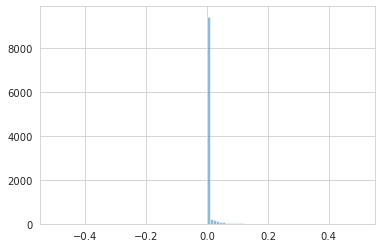

In [30]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, alpha=0.5,range=[-0.5, 0.5])
plt.savefig('../figures/PageValues2.png',dpi=300)
plt.show()

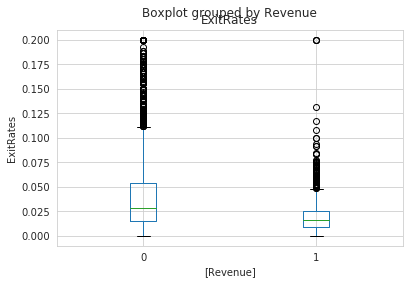

In [31]:
dfAfterDrop[['ExitRates',label]].boxplot(by=label)
plt.ylabel('ExitRates')
plt.savefig('../figures/ExitRates.png',dpi=300)
plt.show()

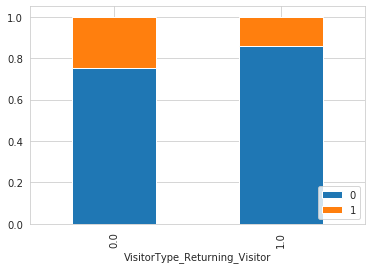

In [32]:
count_matrix = dfAfterDrop.groupby(['VisitorType_Returning_Visitor', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/VisitorType_Returning_Visitor.png',dpi=300)
plt.show()

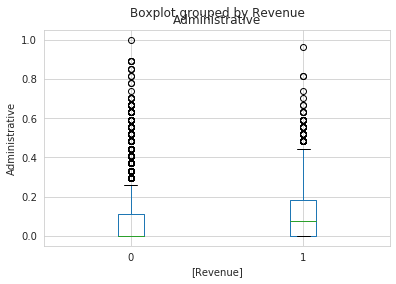

In [33]:
dfAfterDrop[['Administrative',label]].boxplot(by=label)
plt.ylabel('Administrative')
plt.savefig('../figures/Administrative.png',dpi=300)
plt.show()

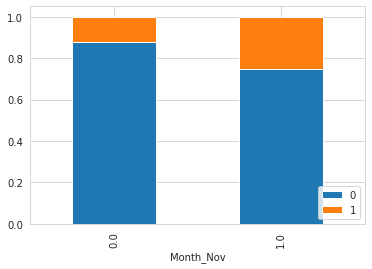

In [34]:
count_matrix = dfAfterDrop.groupby(['Month_Nov', label]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.legend(loc=4)
plt.savefig('../figures/Month_Nov.png',dpi=300)
plt.show()

#### Modelling

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
num_ftrs_stand = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
num_ftrs_minmax = ["Administrative" ,"Informational","ProductRelated","PageValues" ]
onehot_ftrs = ["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType", "Weekend"]
binary_ftrs = ["BounceRates","ExitRates"]
label = 'Revenue'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
dfOnline = pd.read_csv("../data/online_shoppers_intention.csv")
dfOnline = dfOnline.dropna()
dfOnline.reset_index(drop=True, inplace=True)

#y = dfOnline.Revenue
tar =  LabelEncoder()
TaVar = list(dfOnline["Revenue"])
dfTaVar = pd.DataFrame(data = tar.fit_transform(TaVar))
dfTaVar.columns = ["Revenue"]
dfOnline.drop(columns=['Revenue'],inplace=True)
dfnewOnline = pd.concat([dfOnline,dfTaVar],axis = 1)
y = dfnewOnline["Revenue"]


#dfOnline.drop(columns=['Revenue'],inplace=True)
X = dfOnline

In [38]:
def ML_pipeline_kfold_l1(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state = random_state)
    CV_scores = []
    test_scores = []
    best_alphas = []
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]
        # simple preprocessing
        scaler1 = StandardScaler()
        X_train_num1 = scaler1.fit_transform(X_train[num_ftrs_stand])
        X_train_num1 = pd.DataFrame(data = X_train_num1)
        X_train_num1.columns = num_ftrs_stand
        X_c_num1 = scaler1.transform(X_CV[num_ftrs_stand])
        X_c_num1 = pd.DataFrame(data = X_c_num1)
        X_c_num1.columns = num_ftrs_stand
        X_t_num1 = scaler1.transform(X_test[num_ftrs_stand])
        X_t_num1 = pd.DataFrame(data = X_t_num1)
        X_t_num1.columns = num_ftrs_stand
        
        scaler2 = MinMaxScaler()
        X_train_num2 = scaler2.fit_transform(X_train[num_ftrs_minmax])
        X_train_num2 = pd.DataFrame(data = X_train_num2)
        X_train_num2.columns = num_ftrs_minmax
        X_c_num2 = scaler2.transform(X_CV[num_ftrs_minmax])
        X_c_num2 = pd.DataFrame(data = X_c_num2)
        X_c_num2.columns = num_ftrs_minmax
        X_t_num2 = scaler2.transform(X_test[num_ftrs_minmax])
        X_t_num2 = pd.DataFrame(data = X_t_num2)
        X_t_num2.columns = num_ftrs_minmax

        enc = OneHotEncoder(sparse=False,handle_unknown ='ignore')
        allOneHot = enc.fit_transform(X_train[onehot_ftrs])
        colNames = list(enc.get_feature_names(onehot_ftrs))
        X_train_onehot = pd.DataFrame(data = allOneHot)
        X_train_onehot.columns = colNames

        allOneHot2 = enc.transform(X_CV[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_c_onehot = pd.DataFrame(data = allOneHot2)
        X_c_onehot.columns = colNames

        allOneHot3 = enc.transform(X_test[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_t_onehot = pd.DataFrame(data = allOneHot3)
        X_t_onehot.columns = colNames

        X_train_bin = X_train[binary_ftrs]
        X_train_bin.reset_index(drop=True, inplace=True)
        X_train = pd.concat([X_train_num1,X_train_num2, X_train_onehot,X_train_bin],axis = 1)

        X_c_bin = X_CV[binary_ftrs]
        X_c_bin.reset_index(drop=True, inplace=True)
        X_c = pd.concat([X_c_num1,X_c_num2, X_c_onehot, X_c_bin],axis = 1)

        X_t_bin = X_test[binary_ftrs]
        X_t_bin.reset_index(drop=True, inplace=True)
        X_t = pd.concat([X_t_num1,X_t_num2, X_t_onehot, X_t_bin],axis = 1)

        # tune lasso hyper-parameter, alpha
        alpha = np.logspace(-5,2,num=20)
        train_score = []
        CV_score = []
        regs = []
        for a in alpha:
            #reg = Lasso(alpha = a,max_iter=100000)
            reg = LogisticRegression(penalty='l1', C=1/a, max_iter=10000, solver='saga',multi_class = "auto")
            reg.fit(X_train,y_train)
            train_score.append(reg.score(X_train,y_train))
            CV_score.append(reg.score(X_c,y_CV))
            regs.append(reg)
        # find the best alpha in this fold
        best_alpha = alpha[np.argmax(CV_score)]
        best_alphas.append(best_alpha)
        #print(best_alpha)
        # grab the best model
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        # calculate test score using thee best model
        test_scores.append(reg.score(X_t,y_test))
    best_best_alpha = best_alphas[np.argmax(test_scores)]
    return best_best_alpha,test_scores

In [39]:
score_l1 = []
for i in range(5):
    random_state = 42*i
    best_alpha, test_scores = ML_pipeline_kfold_l1(X, y, random_state, 5)
    score_l1.append(test_scores)
    print("random_state = {}".format(random_state))
    print("Best alpha is {}".format(best_alpha))
    print("test accuracy score: {}".format(np.around(np.mean(test_scores),3)))
  
print('test accuracy score (Combining 5 random state):', np.around(np.mean(score_l1),3), '+/-', np.around(np.std(score_l1),3))

random_state = 0
Best alpha is 0.11288378916846883
test accuracy score: 0.881
random_state = 42
Best alpha is 1e-05
test accuracy score: 0.877
random_state = 84
Best alpha is 1e-05
test accuracy score: 0.885
random_state = 126
Best alpha is 0.26366508987303555
test accuracy score: 0.881
random_state = 168
Best alpha is 0.04832930238571752
test accuracy score: 0.884
test accuracy score (Combining 5 random state): 0.882 +/- 0.004


Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
def ML_pipeline_kfold_rf(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state = random_state)
    CV_scores = []
    test_scores = []
    best_ds = []
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]
        
        scaler1 = StandardScaler()
        X_train_num1 = scaler1.fit_transform(X_train[num_ftrs_stand])
        X_train_num1 = pd.DataFrame(data = X_train_num1)
        X_train_num1.columns = num_ftrs_stand
        X_c_num1 = scaler1.transform(X_CV[num_ftrs_stand])
        X_c_num1 = pd.DataFrame(data = X_c_num1)
        X_c_num1.columns = num_ftrs_stand
        X_t_num1 = scaler1.transform(X_test[num_ftrs_stand])
        X_t_num1 = pd.DataFrame(data = X_t_num1)
        X_t_num1.columns = num_ftrs_stand
        
        scaler2 = MinMaxScaler()
        X_train_num2 = scaler2.fit_transform(X_train[num_ftrs_minmax])
        X_train_num2 = pd.DataFrame(data = X_train_num2)
        X_train_num2.columns = num_ftrs_minmax
        X_c_num2 = scaler2.transform(X_CV[num_ftrs_minmax])
        X_c_num2 = pd.DataFrame(data = X_c_num2)
        X_c_num2.columns = num_ftrs_minmax
        X_t_num2 = scaler2.transform(X_test[num_ftrs_minmax])
        X_t_num2 = pd.DataFrame(data = X_t_num2)
        X_t_num2.columns = num_ftrs_minmax

        enc = OneHotEncoder(sparse=False,handle_unknown ='ignore')
        allOneHot = enc.fit_transform(X_train[onehot_ftrs])
        colNames = list(enc.get_feature_names(onehot_ftrs))
        X_train_onehot = pd.DataFrame(data = allOneHot)
        X_train_onehot.columns = colNames

        allOneHot2 = enc.transform(X_CV[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_c_onehot = pd.DataFrame(data = allOneHot2)
        X_c_onehot.columns = colNames

        allOneHot3 = enc.transform(X_test[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_t_onehot = pd.DataFrame(data = allOneHot3)
        X_t_onehot.columns = colNames

        X_train_bin = X_train[binary_ftrs]
        X_train_bin.reset_index(drop=True, inplace=True)
        X_train = pd.concat([X_train_num1,X_train_num2, X_train_onehot,X_train_bin],axis = 1)

        X_c_bin = X_CV[binary_ftrs]
        X_c_bin.reset_index(drop=True, inplace=True)
        X_c = pd.concat([X_c_num1,X_c_num2, X_c_onehot, X_c_bin],axis = 1)

        X_t_bin = X_test[binary_ftrs]
        X_t_bin.reset_index(drop=True, inplace=True)
        X_t = pd.concat([X_t_num1,X_t_num2, X_t_onehot, X_t_bin],axis = 1)
        
        # tune lasso hyper-parameter, alpha
        alpha = np.logspace(-4,2,num=20)
        train_score = []
        CV_score = []
        regs = []
        
        
        depth = [d for d in range(1,20)]
        split = [s for s in range(50,150,10)]
        dep_spl = [(d, s) for d in depth for s in split]
        
        for d, s in dep_spl:
            clf = RandomForestClassifier(n_estimators=100,max_depth=d,min_samples_split = s,random_state=random_state)
            clf.fit(X_train,y_train)
            train_score.append(clf.score(X_train,y_train))
            CV_score.append(clf.score(X_c,y_CV))
            regs.append(clf)
            
       
        # find the best alpha in this fold
        best_d, best_s = dep_spl[np.argmax(CV_score)]
        best_ds.append((best_d, best_s))
        #print(best_d, best_s)
        # grab the best model
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        # calculate test score using thee best model
        test_scores.append(reg.score(X_t,y_test))
    
    best_best_ds = best_ds[np.argmax(test_scores)] 
    return best_best_ds, test_scores

In [20]:
score_rf = []
for i in range(5):
    random_state = 42*i
    best_best_ds, test_scores = ML_pipeline_kfold_rf(X, y, random_state, 5)
    score_rf.append(test_scores)
    print("random_state = {}".format(random_state))
    print('Best max_depth is {} and best min_samples_split is {}.'.format(best_best_ds[0],best_best_ds[1]))
    print("test accuracy score: {}".format(np.around(np.mean(test_scores),3)))

print('test accuracy score(Combining 5 random_state):',np.around(np.mean(score_rf),3),'+/-',np.around(np.std(score_rf),3))


random_state = 0
Best max_depth is 14 and best min_samples_split is 90.
test accuracy score: 0.894
random_state = 42
Best max_depth is 14 and best min_samples_split is 90.
test accuracy score: 0.887
random_state = 84
Best max_depth is 11 and best min_samples_split is 100.
test accuracy score: 0.897
random_state = 126
Best max_depth is 13 and best min_samples_split is 90.
test accuracy score: 0.899
random_state = 168
Best max_depth is 14 and best min_samples_split is 90.
test accuracy score: 0.896
test accuracy score(Combining 5 random_state): 0.894 +/- 0.005


In [5]:
from sklearn.svm import SVC
def ML_pipeline_kfold_SVC(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state = random_state)
    CV_scores = []
    test_scores = []
    best_gc = []
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]
        # simple preprocessing
        scaler1 = StandardScaler()
        X_train_num1 = scaler1.fit_transform(X_train[num_ftrs_stand])
        X_train_num1 = pd.DataFrame(data = X_train_num1)
        X_train_num1.columns = num_ftrs_stand
        X_c_num1 = scaler1.transform(X_CV[num_ftrs_stand])
        X_c_num1 = pd.DataFrame(data = X_c_num1)
        X_c_num1.columns = num_ftrs_stand
        X_t_num1 = scaler1.transform(X_test[num_ftrs_stand])
        X_t_num1 = pd.DataFrame(data = X_t_num1)
        X_t_num1.columns = num_ftrs_stand
        
        scaler2 = MinMaxScaler()
        X_train_num2 = scaler2.fit_transform(X_train[num_ftrs_minmax])
        X_train_num2 = pd.DataFrame(data = X_train_num2)
        X_train_num2.columns = num_ftrs_minmax
        X_c_num2 = scaler2.transform(X_CV[num_ftrs_minmax])
        X_c_num2 = pd.DataFrame(data = X_c_num2)
        X_c_num2.columns = num_ftrs_minmax
        X_t_num2 = scaler2.transform(X_test[num_ftrs_minmax])
        X_t_num2 = pd.DataFrame(data = X_t_num2)
        X_t_num2.columns = num_ftrs_minmax

        enc = OneHotEncoder(sparse=False,handle_unknown ='ignore')
        allOneHot = enc.fit_transform(X_train[onehot_ftrs])
        colNames = list(enc.get_feature_names(onehot_ftrs))
        X_train_onehot = pd.DataFrame(data = allOneHot)
        X_train_onehot.columns = colNames

        allOneHot2 = enc.transform(X_CV[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_c_onehot = pd.DataFrame(data = allOneHot2)
        X_c_onehot.columns = colNames

        allOneHot3 = enc.transform(X_test[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_t_onehot = pd.DataFrame(data = allOneHot3)
        X_t_onehot.columns = colNames

        X_train_bin = X_train[binary_ftrs]
        X_train_bin.reset_index(drop=True, inplace=True)
        X_train = pd.concat([X_train_num1,X_train_num2, X_train_onehot,X_train_bin],axis = 1)

        X_c_bin = X_CV[binary_ftrs]
        X_c_bin.reset_index(drop=True, inplace=True)
        X_c = pd.concat([X_c_num1,X_c_num2, X_c_onehot, X_c_bin],axis = 1)

        X_t_bin = X_test[binary_ftrs]
        X_t_bin.reset_index(drop=True, inplace=True)
        X_t = pd.concat([X_t_num1,X_t_num2, X_t_onehot, X_t_bin],axis = 1)

        # tune lasso hyper-parameter, alpha
        train_score = []
        CV_score = []
        regs = []
        
        C = np.logspace(-3, 5, 5)
        gamma = np.logspace(-10, 3, 5)
        gam_c = [(g, c) for g in gamma for c in C]

        score_svm = []
        for g, c in gam_c:    
            clf = SVC(gamma = g, C = c, probability=True)
            clf.fit(X_train,y_train)
            train_score.append(clf.score(X_train,y_train))
            CV_score.append(clf.score(X_c,y_CV))
            regs.append(clf)
        
        gam,c = gam_c[np.argmax(CV_score)]
        best_gc.append((gam,c))
        #print(gam,c)
        # grab the best model
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        # calculate test score using thee best model
        test_scores.append(reg.score(X_t,y_test))
    best_best_gc = best_gc[np.argmax(test_scores)]
    return best_best_gc,test_scores

In [ ]:
score_svc = []
for i in range(5):
    random_state = 42*i
    best_best_gc, test_scores = ML_pipeline_kfold_SVC(X, y, random_state, 5)
    score_rf.append(test_scores)
    print("random_state = {}".format(random_state))
    print('Best gamma is {} and best C is {}.'.format(best_best_gc[0],best_best_gc[1]))
    print("test accuracy score: {}".format(np.around(np.mean(test_scores),3)))


print('test accuracy score(Combining 5 random_state):',np.around(np.mean(score_svc),3),'+/-',np.around(np.std(score_svc),3))


In [4]:
from sklearn.neighbors import KNeighborsClassifier

def ML_pipeline_kfold_KNN(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state = random_state)
    CV_scores = []
    test_scores = []
    best_n = []
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]
        # simple preprocessing
        scaler1 = StandardScaler()
        X_train_num1 = scaler1.fit_transform(X_train[num_ftrs_stand])
        X_train_num1 = pd.DataFrame(data = X_train_num1)
        X_train_num1.columns = num_ftrs_stand
        X_c_num1 = scaler1.transform(X_CV[num_ftrs_stand])
        X_c_num1 = pd.DataFrame(data = X_c_num1)
        X_c_num1.columns = num_ftrs_stand
        X_t_num1 = scaler1.transform(X_test[num_ftrs_stand])
        X_t_num1 = pd.DataFrame(data = X_t_num1)
        X_t_num1.columns = num_ftrs_stand
        
        scaler2 = MinMaxScaler()
        X_train_num2 = scaler2.fit_transform(X_train[num_ftrs_minmax])
        X_train_num2 = pd.DataFrame(data = X_train_num2)
        X_train_num2.columns = num_ftrs_minmax
        X_c_num2 = scaler2.transform(X_CV[num_ftrs_minmax])
        X_c_num2 = pd.DataFrame(data = X_c_num2)
        X_c_num2.columns = num_ftrs_minmax
        X_t_num2 = scaler2.transform(X_test[num_ftrs_minmax])
        X_t_num2 = pd.DataFrame(data = X_t_num2)
        X_t_num2.columns = num_ftrs_minmax

        enc = OneHotEncoder(sparse=False,handle_unknown ='ignore')
        allOneHot = enc.fit_transform(X_train[onehot_ftrs])
        colNames = list(enc.get_feature_names(onehot_ftrs))
        X_train_onehot = pd.DataFrame(data = allOneHot)
        X_train_onehot.columns = colNames

        allOneHot2 = enc.transform(X_CV[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_c_onehot = pd.DataFrame(data = allOneHot2)
        X_c_onehot.columns = colNames

        allOneHot3 = enc.transform(X_test[onehot_ftrs])
        #colNames = list(enc.get_feature_names(onehot_ftrs))
        X_t_onehot = pd.DataFrame(data = allOneHot3)
        X_t_onehot.columns = colNames

        X_train_bin = X_train[binary_ftrs]
        X_train_bin.reset_index(drop=True, inplace=True)
        X_train = pd.concat([X_train_num1,X_train_num2, X_train_onehot,X_train_bin],axis = 1)

        X_c_bin = X_CV[binary_ftrs]
        X_c_bin.reset_index(drop=True, inplace=True)
        X_c = pd.concat([X_c_num1,X_c_num2, X_c_onehot, X_c_bin],axis = 1)

        X_t_bin = X_test[binary_ftrs]
        X_t_bin.reset_index(drop=True, inplace=True)
        X_t = pd.concat([X_t_num1,X_t_num2, X_t_onehot, X_t_bin],axis = 1)

        # tune lasso hyper-parameter, alpha
        train_score = []
        CV_score = []
        regs = []
        
        N = range(5,50,5)


        score_knn = []
        for n in N:    
            clf = KNeighborsClassifier(n_neighbors = n)
            clf.fit(X_train,y_train)
            train_score.append(clf.score(X_train,y_train))
            CV_score.append(clf.score(X_c,y_CV))
            regs.append(clf)
        
        n= N[np.argmax(CV_score)]
        best_n.append(n)

        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        # calculate test score using thee best model
        test_scores.append(reg.score(X_t,y_test))
    best_best_n = best_n[np.argmax(test_scores)]
    return best_best_n,test_scores

In [6]:
score_knn = []
for i in range(5):
    random_state = 42*i
    best_n, test_scores = ML_pipeline_kfold_KNN(X, y, random_state, 5)
    score_knn.append(test_scores)
    print("random_state = {}".format(random_state))
    print("Best k is {}".format(best_n))
    print("test accuracy score: {}".format(np.around(np.mean(test_scores),3)))
  
print('test accuracy score (Combining 5 random state):', np.around(np.mean(score_knn),3), '+/-', np.around(np.std(score_knn),3))

random_state = 0
Best k is 20
test accuracy score: 0.842
random_state = 42
Best k is 40
test accuracy score: 0.847
random_state = 84
Best k is 35
test accuracy score: 0.844
random_state = 126
Best k is 25
test accuracy score: 0.844
random_state = 168
Best k is 35
test accuracy score: 0.845
test accuracy score (Combining 5 random state): 0.844 +/- 0.002


#### Compare

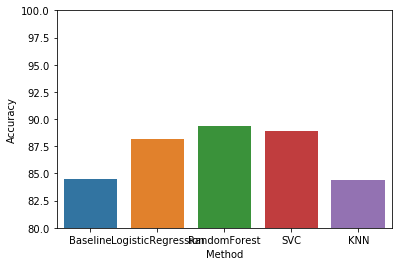

In [8]:
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
data= [['Baseline',84.51],['LogisticRegression',88.20],['RandomForest',89.40],['SVC',88.90],['KNN',84.40]]
accuracy_compare = pd.DataFrame(data, columns = ['Method', 'Accuracy'])

sns.barplot(x=accuracy_compare['Method'],y=accuracy_compare['Accuracy'])
plt.ylim(80,100)
plt.savefig('../figures/accuracy_compare', dpi=300, bbox_inches = "tight")
plt.show()

#### Global Feature importance

In [83]:
import matplotlib.pyplot as plt

In [84]:
ftrs = dfCombined.columns


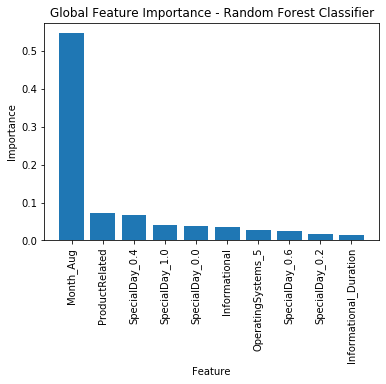

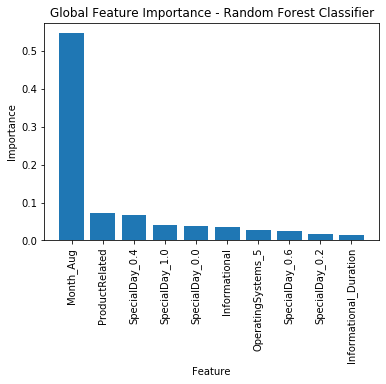

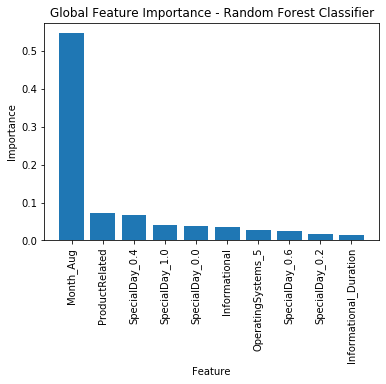

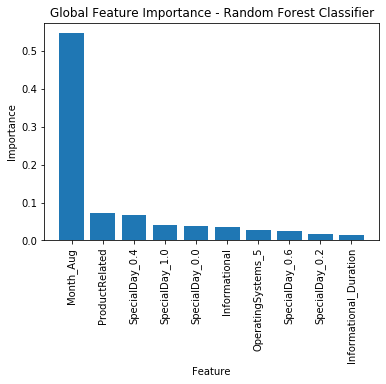

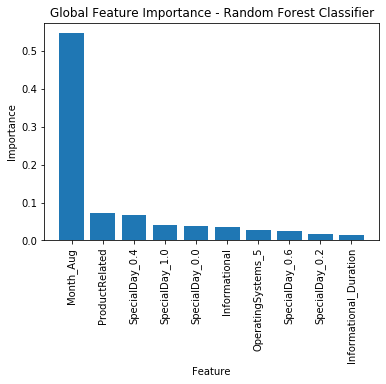

In [87]:
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                        random_state = 168)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=168)

clf_rfs = []
ds = [14, 14, 13, 13, 11]
ss = [90, 110, 90, 90, 100]
ind = 0
for train_index, CV_index in kf.split(X_other, y_other):
    X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
    y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]
        
    
    scaler1 = StandardScaler()
    X_train_num1 = scaler1.fit_transform(X_train[num_ftrs_stand])
    X_train_num1 = pd.DataFrame(data = X_train_num1)
    X_train_num1.columns = num_ftrs_stand
    X_c_num1 = scaler1.transform(X_CV[num_ftrs_stand])
    X_c_num1 = pd.DataFrame(data = X_c_num1)
    X_c_num1.columns = num_ftrs_stand
    X_t_num1 = scaler1.transform(X_test[num_ftrs_stand])
    X_t_num1 = pd.DataFrame(data = X_t_num1)
    X_t_num1.columns = num_ftrs_stand

    scaler2 = MinMaxScaler()
    X_train_num2 = scaler2.fit_transform(X_train[num_ftrs_minmax])
    X_train_num2 = pd.DataFrame(data = X_train_num2)
    X_train_num2.columns = num_ftrs_minmax
    X_c_num2 = scaler2.transform(X_CV[num_ftrs_minmax])
    X_c_num2 = pd.DataFrame(data = X_c_num2)
    X_c_num2.columns = num_ftrs_minmax
    X_t_num2 = scaler2.transform(X_test[num_ftrs_minmax])
    X_t_num2 = pd.DataFrame(data = X_t_num2)
    X_t_num2.columns = num_ftrs_minmax

    enc = OneHotEncoder(sparse=False,handle_unknown ='ignore')
    allOneHot = enc.fit_transform(X_train[onehot_ftrs])
    colNames = list(enc.get_feature_names(onehot_ftrs))
    X_train_onehot = pd.DataFrame(data = allOneHot)
    X_train_onehot.columns = colNames

    allOneHot2 = enc.transform(X_CV[onehot_ftrs])
    #colNames = list(enc.get_feature_names(onehot_ftrs))
    X_c_onehot = pd.DataFrame(data = allOneHot2)
    X_c_onehot.columns = colNames

    allOneHot3 = enc.transform(X_test[onehot_ftrs])
    #colNames = list(enc.get_feature_names(onehot_ftrs))
    X_t_onehot = pd.DataFrame(data = allOneHot3)
    X_t_onehot.columns = colNames

    X_train_bin = X_train[binary_ftrs]
    X_train_bin.reset_index(drop=True, inplace=True)
    X_train = pd.concat([X_train_num1,X_train_num2, X_train_onehot,X_train_bin],axis = 1)

    X_c_bin = X_CV[binary_ftrs]
    X_c_bin.reset_index(drop=True, inplace=True)
    X_c = pd.concat([X_c_num1,X_c_num2, X_c_onehot, X_c_bin],axis = 1)

    X_t_bin = X_test[binary_ftrs]
    X_t_bin.reset_index(drop=True, inplace=True)
    X_t = pd.concat([X_t_num1,X_t_num2, X_t_onehot, X_t_bin],axis = 1)

    X_train_, X_CV_, X_test_ = X_train, X_c, X_t
    
    
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=168, max_depth=ds[ind], min_samples_split=ss[ind])
    clf_rfs.append(clf_rf)
    ind += 1


    
    clf_rf.fit(X_train_, y_train)
    imp.append(list(clf_rf.feature_importances_))
    sort_imp = sorted((e,i) for i,e in enumerate(imp[0]))
    imp_ind = sorted(sort_imp, reverse = True)
    important = []
    important_ind = []
    for i in range(10):
        important.append(imp_ind[i][0])
        important_ind.append(imp_ind[i][1])
    
    plt.bar(range(10), important)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Global Feature Importance - Random Forest Classifier")
    plt.xticks(range(10), ftrs[important_ind], rotation='vertical')
    plt.savefig('../figures/global_ftr_importance_rf{}'.format(ind), dpi=300, bbox_inches = "tight")
    plt.show()
